In [1]:
from scipy import stats

In [2]:
import pandas as pd

In [3]:
import pandas_datareader as web

In [4]:
MVDA = pd.read_csv('/home/tumich/Desktop/portfolio/MVDA_100.csv')

In [5]:
MVDA['Date'] = pd.to_datetime(MVDA['Date'], utc=True)
MVDA.set_index('Date',inplace=True)

In [6]:
MVDA = MVDA.loc['2019-09-15':'2020-09-15']

In [7]:
MVDA.head()

,Price
Date,
2019-09-15 00:00:00+00:00,2578.91
2019-09-16 00:00:00+00:00,2552.67
2019-09-17 00:00:00+00:00,2623.05
2019-09-18 00:00:00+00:00,2643.93
2019-09-19 00:00:00+00:00,2606.25


In [8]:
BTC = pd.read_csv('/home/tumich/Desktop/portfolio/btc.csv')

In [9]:
BTC['Date'] = pd.to_datetime(BTC['Date'], utc=True)
BTC.set_index('Date',inplace=True)

In [10]:
BTC = BTC.drop(columns=['market_cap','total_volume'])

In [11]:
BTC.columns = ['Price']

In [12]:
BTC = BTC.loc['2019-09-15':'2020-09-15']

In [13]:
#SC5 = SC*100000

In [13]:
BTC.head()

,Price
Date,
2019-09-15 00:00:00+00:00,10349.551958
2019-09-16 00:00:00+00:00,10305.675020
2019-09-17 00:00:00+00:00,10268.421697
2019-09-18 00:00:00+00:00,10203.071047
2019-09-19 00:00:00+00:00,10158.854517


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

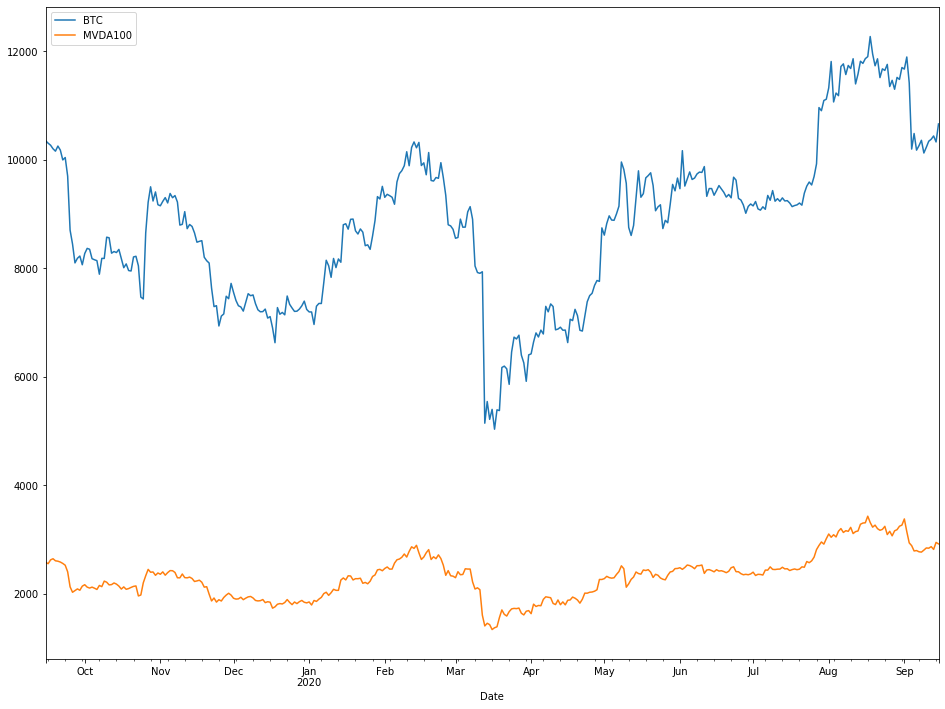

In [15]:
BTC['Price'].plot(label='BTC',figsize=(16,12))
MVDA['Price'].plot(label='MVDA100')
plt.legend();

In [16]:
BTC['Cumulative'] = BTC['Price']/BTC['Price'].iloc[0]
MVDA['Cumulative'] = MVDA['Price']/MVDA['Price'].iloc[0]

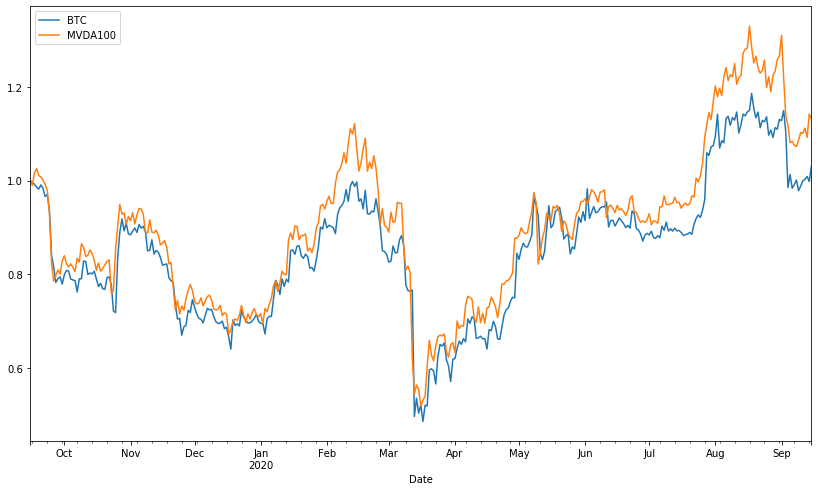

In [17]:
BTC['Cumulative'].plot(label='BTC',figsize=(14,8),grid=True)
MVDA['Cumulative'].plot(label='MVDA100')
plt.legend();

In [18]:
BTC['Daily Return'] = BTC['Price'].pct_change(1)
MVDA['Daily Return'] = MVDA['Price'].pct_change(1)

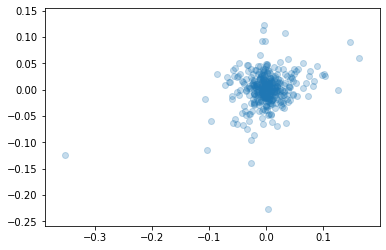

In [19]:
plt.scatter(BTC['Daily Return'],MVDA['Daily Return'],alpha=0.25)

In [20]:
beta,alpha,r_value,p_value,std_err = stats.linregress(BTC['Daily Return'].iloc[1:],MVDA['Daily Return'].iloc[1:])

In [21]:
beta

0.24981634230795224

In [22]:
alpha

0.000702252410938956

In [23]:
r_value

0.27837924972340033

In [28]:
BTCf = BTC.to_csv('BTCf.csv')

In [29]:
BTC.head()

,Price,Cumulative,Daily Return
Date,,,
2019-09-15 00:00:00+00:00,10349.551958,1.000000,NaN
2019-09-16 00:00:00+00:00,10305.675020,0.995760,-0.004240
2019-09-17 00:00:00+00:00,10268.421697,0.992161,-0.003615
2019-09-18 00:00:00+00:00,10203.071047,0.985847,-0.006364
2019-09-19 00:00:00+00:00,10158.854517,0.981574,-0.004334
